In [13]:
#################### Logistic Regression (Two Classes) ####################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#################### Hyperparameters
epoch = 500
etta = 0.02
threshold = 0.5
train_rate = 0.8
val_rate = 0.1
test_rate = 0.1


#################### Loading Dataset and Preprocessing
df = pd.read_csv("data/exam.csv")
data = np.array(df)
M,N = np.shape(data)
N = N-1

X_data = np.reshape(data[:, :-1], (M, N))
Y_data = np.reshape(data[:, -1], (M,1))

def normalization(data):
    M = np.max(data, axis=0)
    m = np.min(data, axis=0)
    out = (data - m)/(M-m)
    return out


def standardisation(data):
    out = (data - np.mean(data, axis=0))/np.std(data, axis=0)
    return out


X_data = standardisation(X_data)
data = np.hstack((X_data, Y_data))


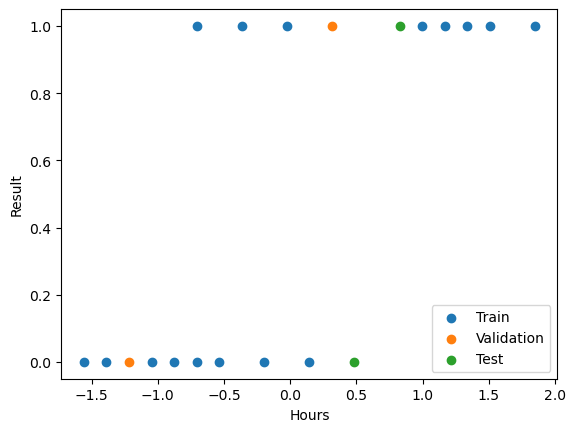

In [14]:
#################### Train-Test-Validation Split

M_train = int(np.ceil(train_rate*M))
M_val = int(np.ceil(val_rate*M))
M_test = M - (M_train + M_val)

idx = np.random.permutation(M)
train_idx = idx[:M_train] 
val_idx = idx[M_train: M_train + M_val]
test_idx = idx[M_train + M_val:]

X_train = data[train_idx, :-1]
Y_train = data[train_idx, -1]
X_val = data[val_idx, :-1]
Y_val = data[val_idx, -1]
X_test = data[test_idx, :-1]
Y_test = data[test_idx, -1]



plt.scatter(X_train, Y_train, label='Train')
plt.scatter(X_val, Y_val, label='Validation')
plt.scatter(X_test, Y_test, label='Test')
plt.xlabel('Hours')
plt.ylabel('Result')
plt.legend(loc="lower right")
plt.show()


In [15]:
#################### Logistic Regression Model

def sigmoid(X):
    out = 1 / (1 + np.exp(-1 * X))
    return out


def cross_entropy(Y, Y_hat, n):
    l1 = np.transpose(Y) @ np.log(Y_hat)
    l2 = np.transpose(1 - Y) @ np.log((1 - Y_hat))
    out = (-1 / n) * (l1 + l2)
    return out


def grad(X, Y, Y_hat, n):
    out = (1 / n) * (np.transpose(X) @ (Y_hat - Y))
    return out


W = np.random.rand(N)

L_train = np.array([])
L_val = np.array([])

for i in range(epoch):
    Z_train = X_train @ W
    Y_hat_train = sigmoid(Z_train)
    Z_val = X_val @ W
    Y_hat_val = sigmoid(Z_val)
    
    c_train = cross_entropy(Y_train, Y_hat_train, M_train)
    L_train = np.append(L_train, c_train)
    c_val = cross_entropy(Y_val, Y_hat_val, M_val)
    L_val = np.append(L_val, c_val)
    
    W = W - (etta * grad(X_train, Y_train, Y_hat_train, M_train))
    


In [16]:
#################### Validation and Test
def accuracy(Y, Y_hat, n):
    out = (np.sum(Y == np.round(Y_hat))) / n
    return out

def TP(Y, Y_hat, n):
    l1 = np.where(Y == 1)
    l2 = np.where(Y_hat == 1)
    out = len(np.intersect1d(l1,l2)) / n
    return out

def FP(Y, Y_hat, n):
    l1 = np.where(Y == 0)
    l2 = np.where(Y_hat == 1)
    out = len(np.intersect1d(l1,l2)) / n
    return out

def FN(Y, Y_hat, n):
    l1 = np.where(Y == 1)
    l2 = np.where(Y_hat == 0)
    out = len(np.intersect1d(l1,l2)) / n
    return out

def TN(Y, Y_hat, n):
    l1 = np.where(Y == 0)
    l2 = np.where(Y_hat == 0)
    out = len(np.intersect1d(l1,l2)) / n
    return out


def recall(tp, fn):
    if tp == 0:
        return 0
    else:
        out = tp / (tp + fn)
        return out


def precision(tp, fp):
    if tp == 0:
        return 0
    else:
        out = tp / (tp + fp)
        return out
    
    
def f_score(tp, fp, fn):
    if tp == 0:
        return 0
    else:
        out = tp / (tp + (fp + fn)/2)
        return out
    
    
    
Y_test = Y_test.flatten()
Y_hat_test = X_test @ W
predicts = sigmoid(Y_hat_test)
predicts = predicts >= threshold
predicts = predicts.astype(float)

acc = accuracy(Y_test, predicts, M_test)
tp = TP(Y_test, predicts, M_test)
fp = FP(Y_test, predicts, M_test)
fn = FN(Y_test, predicts, M_test)
tn = TN(Y_test, predicts, M_test)
rec = recall(tp, fn)
prec = precision(tp ,fp)
f1 = f_score(tp, fp, fn)



print("Accuracy: ", acc)
print("TP is: ", tp)
print("FP is: ", fp)
print("FN is:", fn)
print("TN is: ", tn)
print("Recall is: ", rec)
print("Precision is: ", prec)
print("F1 Score is: ", f1)

Accuracy:  0.5
TP is:  0.5
FP is:  0.5
FN is: 0.0
TN is:  0.0
Recall is:  1.0
Precision is:  0.5
F1 Score is:  0.6666666666666666


In [19]:
#################### Confusion Matrix
from tabulate import tabulate

# assign data
mydata = [
    ["", "Positive", "Negative"], 
    ["Positive", tp, fp], 
    ["Negative", fn, tn]
]
 
print(tabulate(mydata, tablefmt="grid"))

+----------+----------+----------+
|          | Positive | Negative |
+----------+----------+----------+
| Positive | 0.5      | 0.5      |
+----------+----------+----------+
| Negative | 0.0      | 0.0      |
+----------+----------+----------+


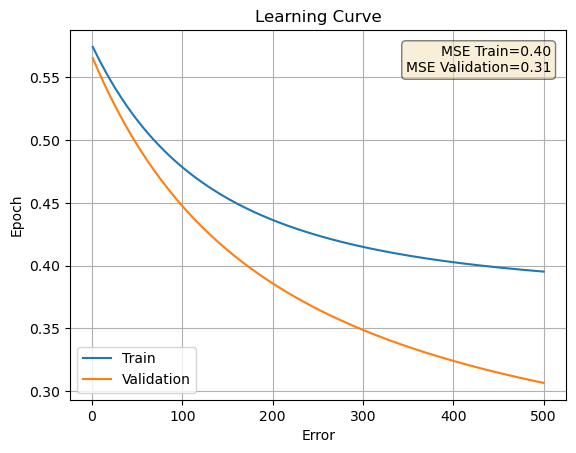

In [18]:
#################### Learning Curve

fig, ax = plt.subplots()

plt.plot(range(1, epoch+1), L_train, label='Train')
plt.plot(range(1, epoch+1), L_val, label='Validation')
plt.title("Learning Curve")
plt.xlabel("Error")
plt.ylabel("Epoch")
plt.grid()
plt.legend(loc="lower left")


txt = '\n'.join((
    r'MSE Train=%.2f' % (L_train[-1], ),
    r'MSE Validation=%.2f' % (L_val[-1], )
    ))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0.97, 0.96, txt, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()
